In [5]:
%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

# Loading the InstacartOrdersByDepartment dataset

Instacart is a grocery store delivery service. People place orders online, requested products are gathered at the grocery store, and delivered to the person’s location, sometimes within an hour. Instacart made data for several million of these orders publicly available on their website (https://www.instacart.com/datasets/grocery-shopping-2017 (Links to an external site.))

Each row is a summary of orders associated with a particular hour in the day and a particular department.
    1. order_hour_of_day: The hour of the day when the order was placed (0 = 12am, 1 = 1am etc)
    2. department: The department the products came from (e.g. alcohol, produce)
    3. num_orders_hour: The number of products ordered from this particular department during this particular hour.
    4. Tot_orders_dept: The total number of products ordered from this particular department across all hours of the day.

In [6]:
train = pd.read_csv("InstacartOrdersByDepartment.csv")
train.head(10)

,order_hour_of_day,department,num_orders_hour,tot_orders_dept
0,0,alcohol,33.0,5598.0
1,1,alcohol,32.0,5598.0
2,2,alcohol,5.0,5598.0
3,3,alcohol,3.0,5598.0
4,4,alcohol,2.0,5598.0
5,5,alcohol,12.0,5598.0
6,6,alcohol,34.0,5598.0
7,7,alcohol,92.0,5598.0
8,8,alcohol,161.0,5598.0
9,9,alcohol,343.0,5598.0


# Columns and unique departments


In [122]:
print('The columns of the dataset: ',train.columns)
print('Departments: ',train.department.unique())

food_departments = ['alcohol','bakery','beverages','breakfast','bulk','canned goods','dairy eggs','deli','dry goods pasta','frozen','meat seafood','pantry', 
 'snacks']

print('Departments for food only: ',food_departments)

The columns of the dataset:  Index(['order_hour_of_day', 'department', 'num_orders_hour',
       'tot_orders_dept'],
      dtype='object')
Departments:  ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household' 'international'
 'meat seafood' 'missing' 'other' 'pantry' 'personal care' 'pets' 'produce'
 'snacks']
Departments for food only:  ['alcohol', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'meat seafood', 'pantry', 'snacks']


In [ ]:
## Alcohol Consuption

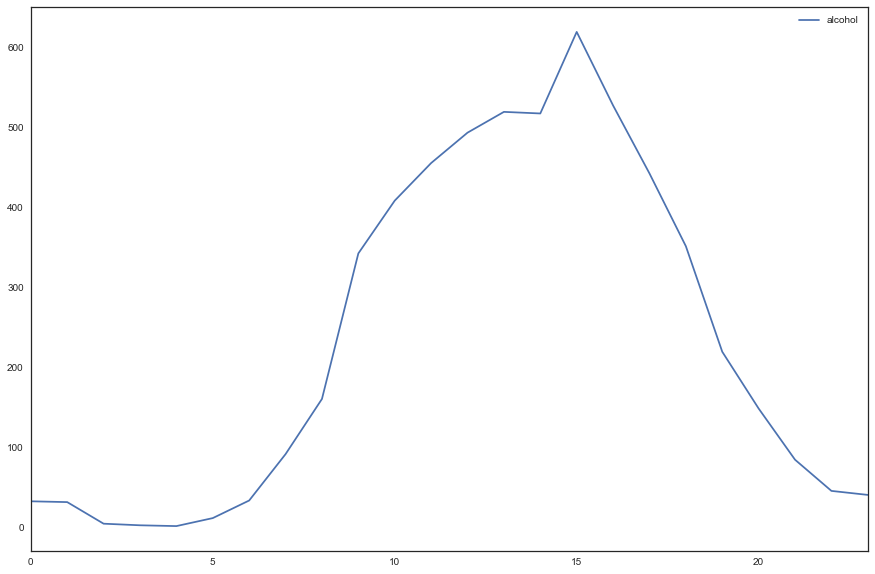

In [27]:
alcohol = train['num_orders_hour'][train['department']=='alcohol']

labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

colors = ['m','c','r','b']

df = pd.DataFrame({'alcohol': alcohol}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

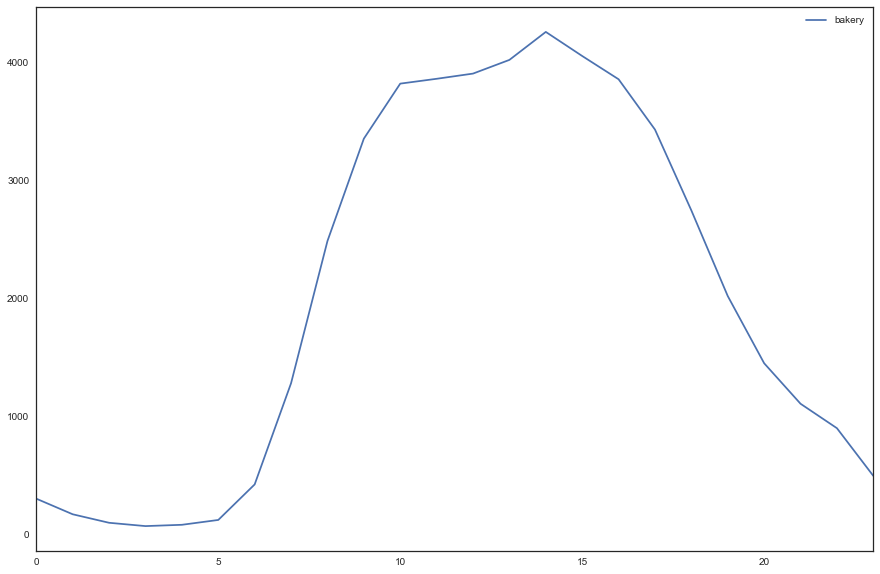

In [71]:
bakery = train['num_orders_hour'][train['department']=='bakery']

for i in range(48,72):
    bakery[i%24] = bakery[i]
    
colors = ['m','c','r','b']



df = pd.DataFrame({'bakery': bakery}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

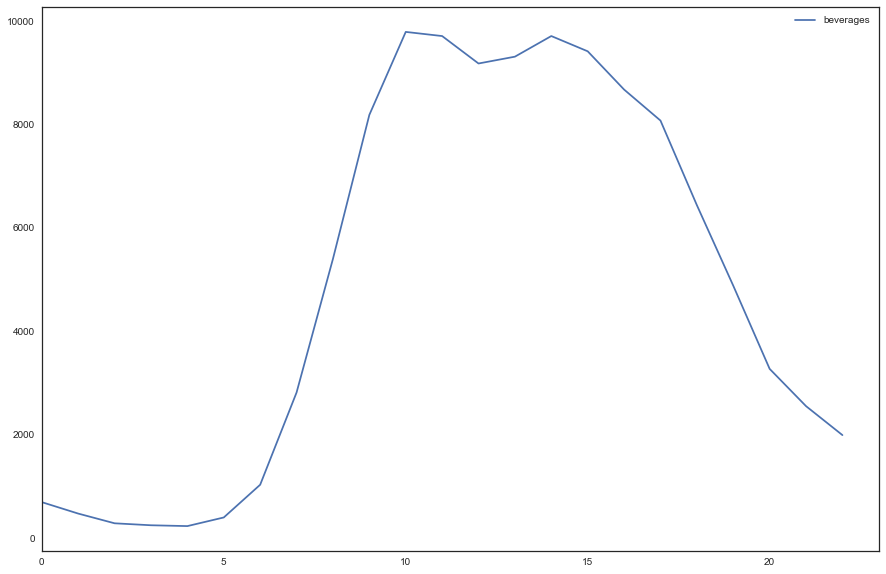

In [73]:
beverages = train['num_orders_hour'][train['department']=='beverages']

for i in range(72,95):
    beverages[i%24] = beverages[i]
    
colors = ['m','c','r','b']



df = pd.DataFrame({'beverages': beverages}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

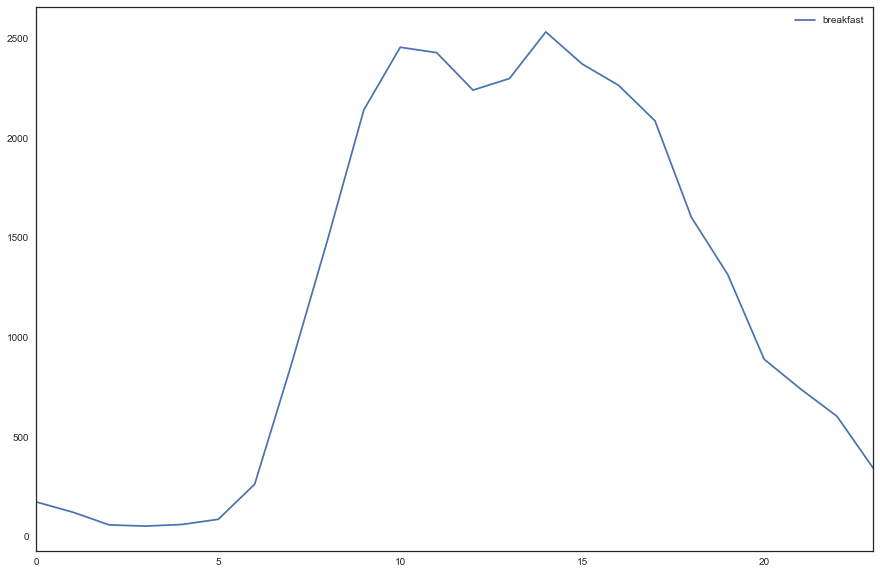

In [75]:
breakfast = train['num_orders_hour'][train['department']=='breakfast']

for i in range(96,120):
    breakfast[i%24] = breakfast[i]
    

df = pd.DataFrame({'breakfast': breakfast}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

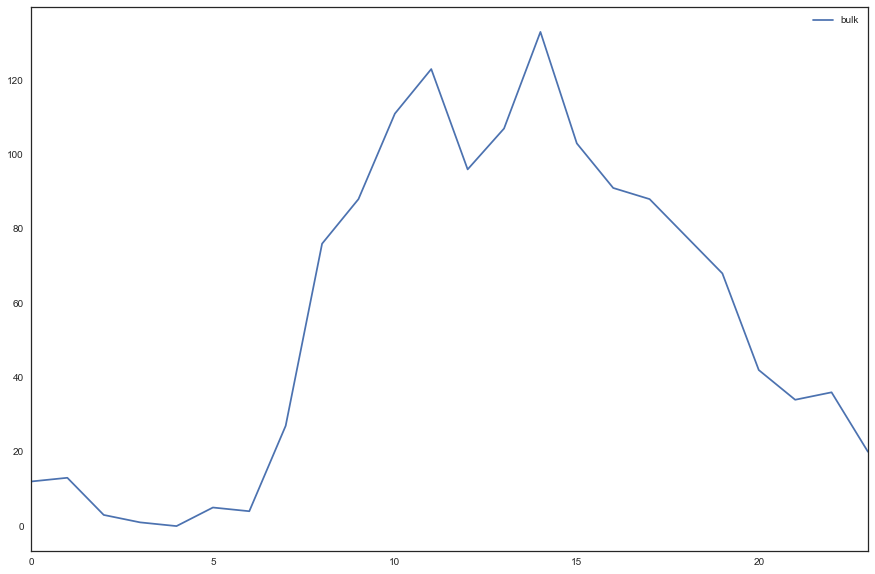

In [78]:
bulk = train['num_orders_hour'][train['department']=='bulk']

for i in range(120,144):
    bulk[i%24] = bulk[i]
    

df = pd.DataFrame({'bulk': bulk}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

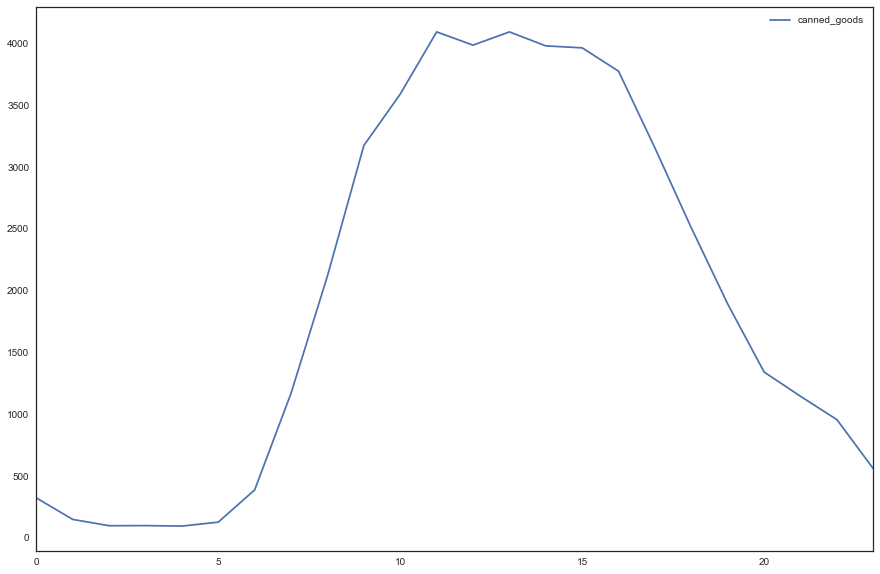

In [82]:
canned_goods = train['num_orders_hour'][train['department']=='canned goods']


for i in range(144,168):
    canned_goods[i%24] = canned_goods[i]
    

df = pd.DataFrame({'canned_goods': canned_goods}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

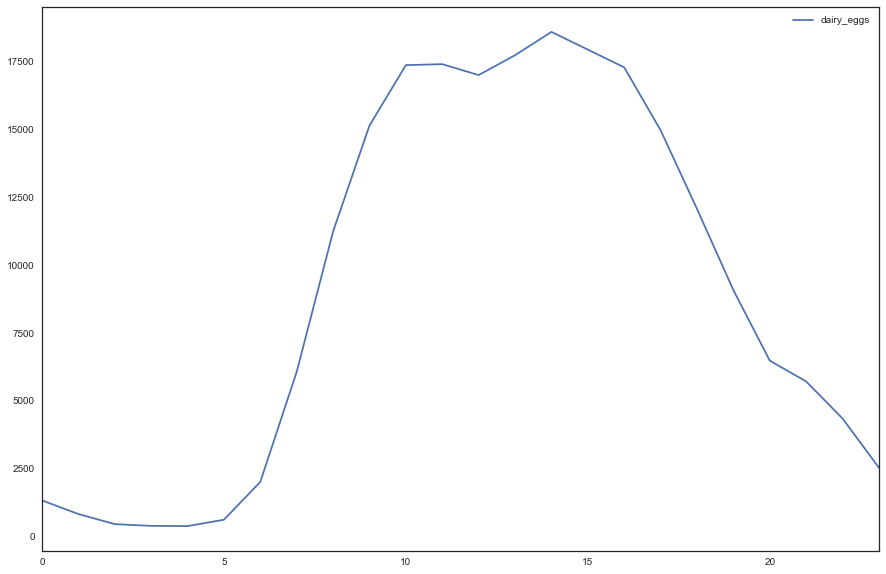

In [86]:
dairy_eggs = train['num_orders_hour'][train['department']=='dairy eggs']

for i in range(168,192):
    dairy_eggs[i%24] = dairy_eggs[i]
    

df = pd.DataFrame({'dairy_eggs': dairy_eggs}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

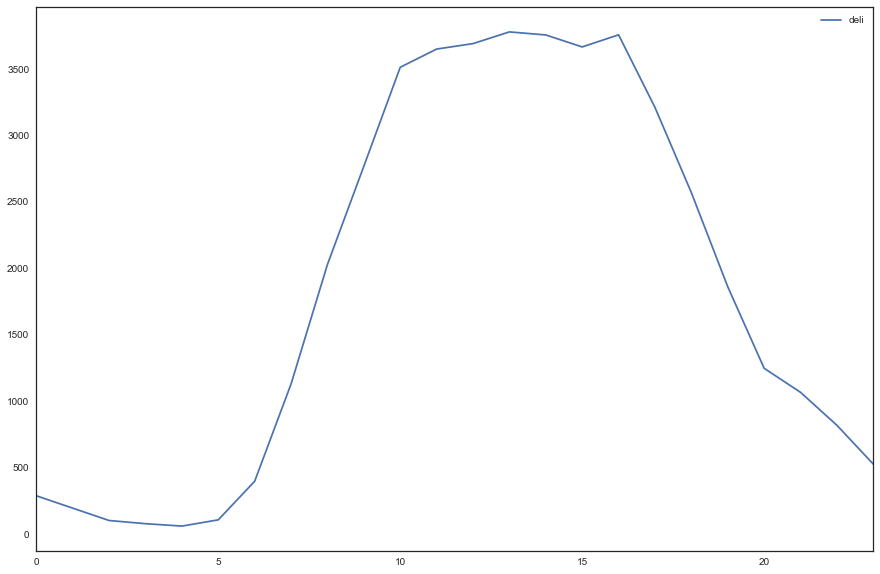

In [91]:
deli = train['num_orders_hour'][train['department']=='deli']

for i in range(192,216):
    deli[i%24] = deli[i]
    

df = pd.DataFrame({'deli': deli}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

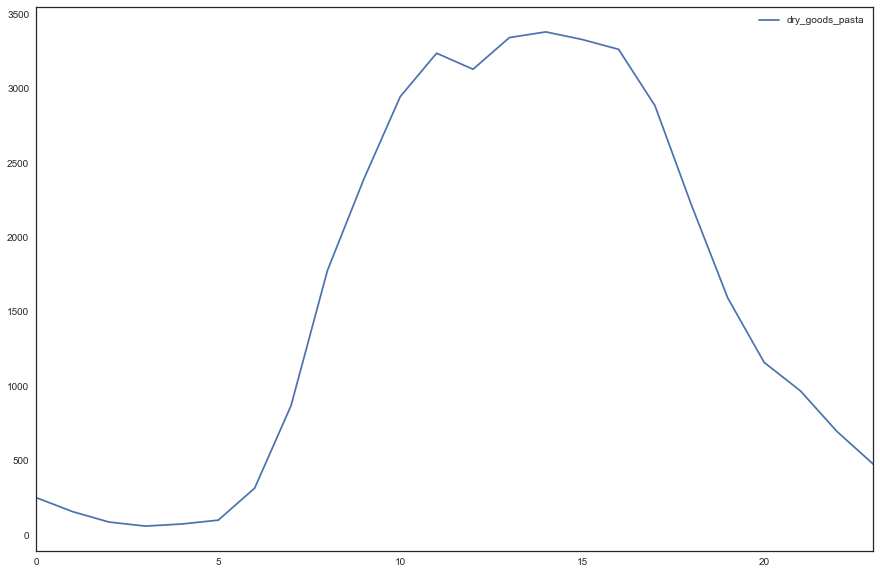

In [94]:
dry_goods_pasta = train['num_orders_hour'][train['department']=='dry goods pasta']

for i in range(216,240):
    dry_goods_pasta[i%24] = dry_goods_pasta[i]
    

df = pd.DataFrame({'dry_goods_pasta': dry_goods_pasta}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

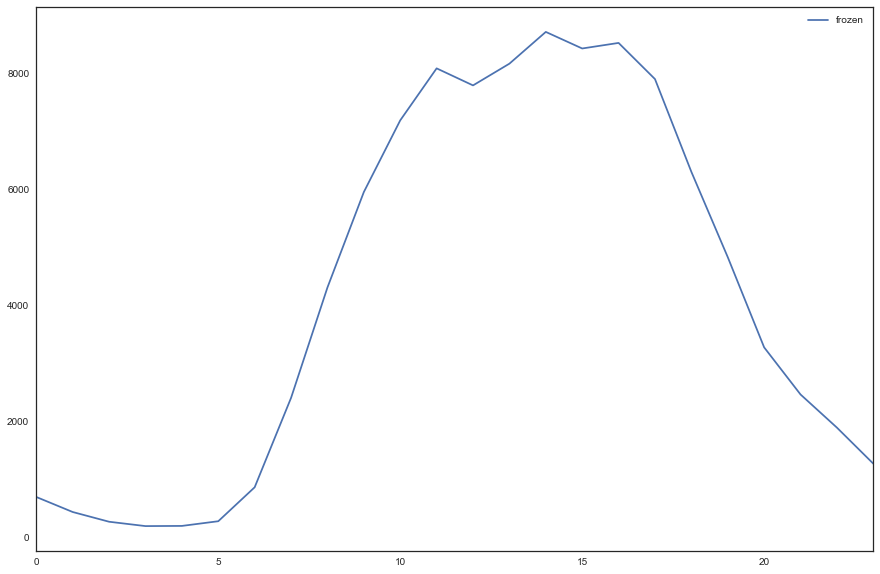

In [97]:
frozen = train['num_orders_hour'][train['department']=='frozen']


for i in range(240,264):
    frozen[i%24] = frozen[i]
    

df = pd.DataFrame({'frozen': frozen}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

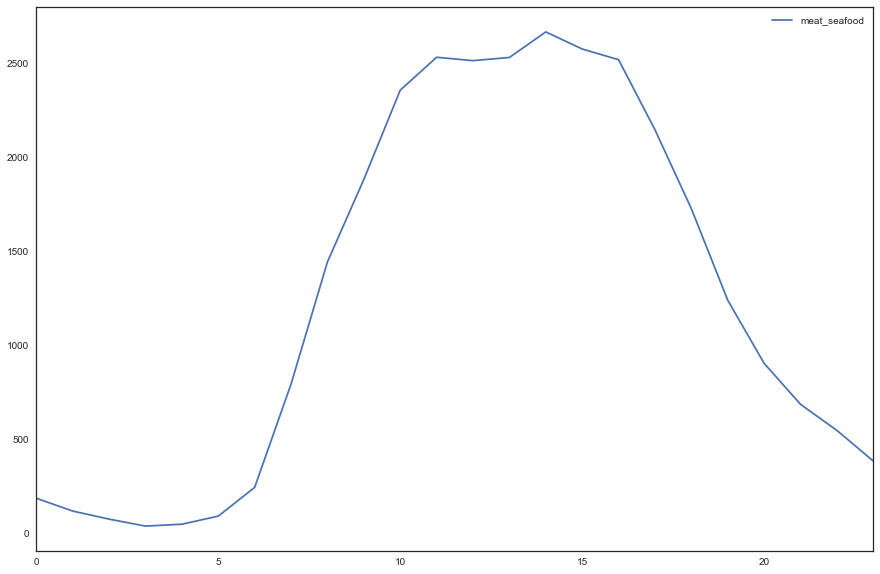

In [100]:
meat_seafood = train['num_orders_hour'][train['department']=='meat seafood']

for i in range(312,336):
    meat_seafood[i%24] = meat_seafood[i]
    

df = pd.DataFrame({'meat_seafood': meat_seafood}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

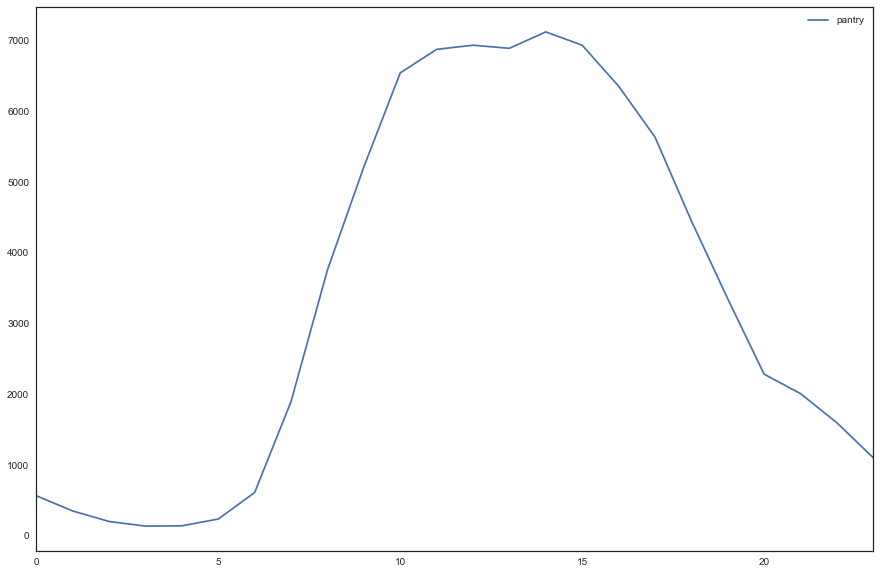

In [104]:
pantry = train['num_orders_hour'][train['department']=='pantry']

for i in range(384,408):
    pantry[i%24] = pantry[i]
    

df = pd.DataFrame({'pantry': pantry}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

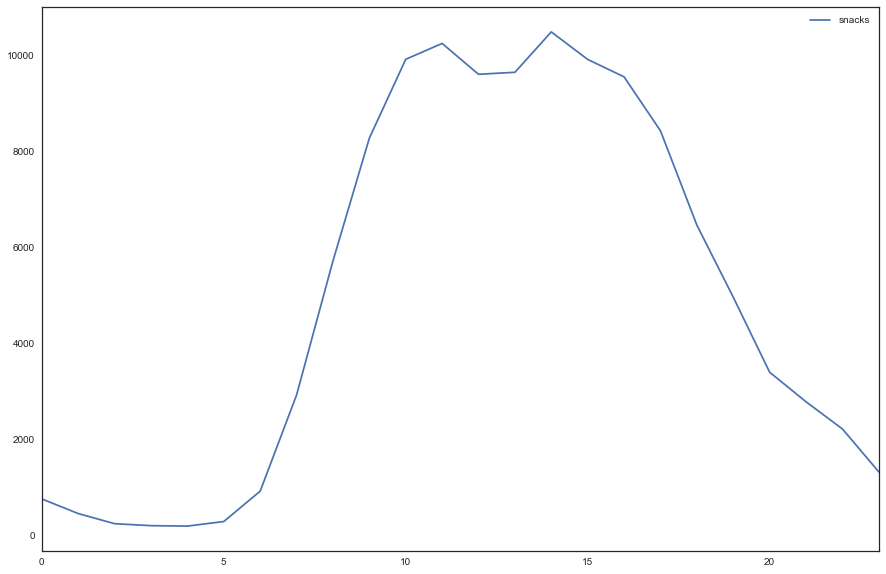

In [108]:

snacks = train['num_orders_hour'][train['department']=='snacks']

for i in range(480,504):
    snacks[i%24] = snacks[i]
    

df = pd.DataFrame({'snacks': snacks}, index=labels)
ax = df.plot(kind='line',rot=0,figsize=(15,10))

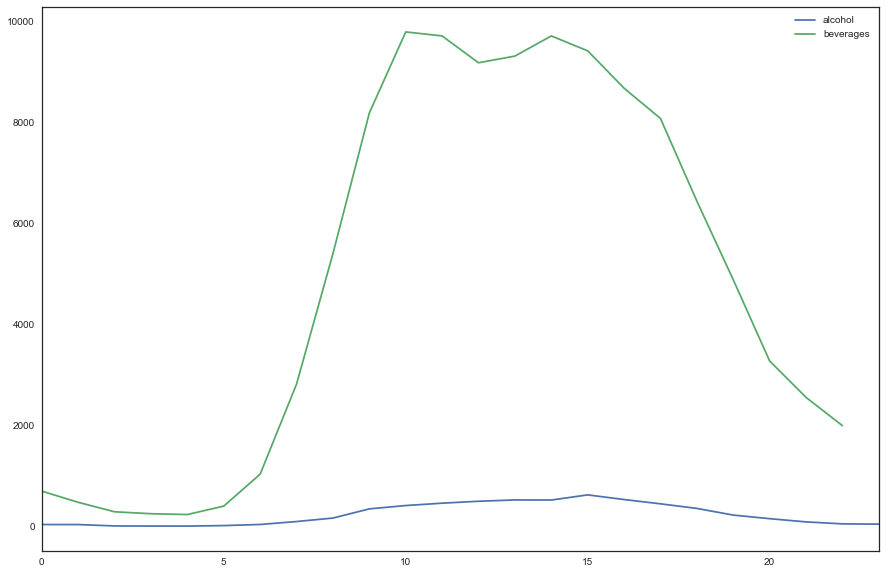

In [126]:

df = pd.DataFrame({'alcohol':alcohol,
                   'beverages':beverages}, index=labels)

ax = df.plot(kind='line',rot=0,figsize=(15,10))


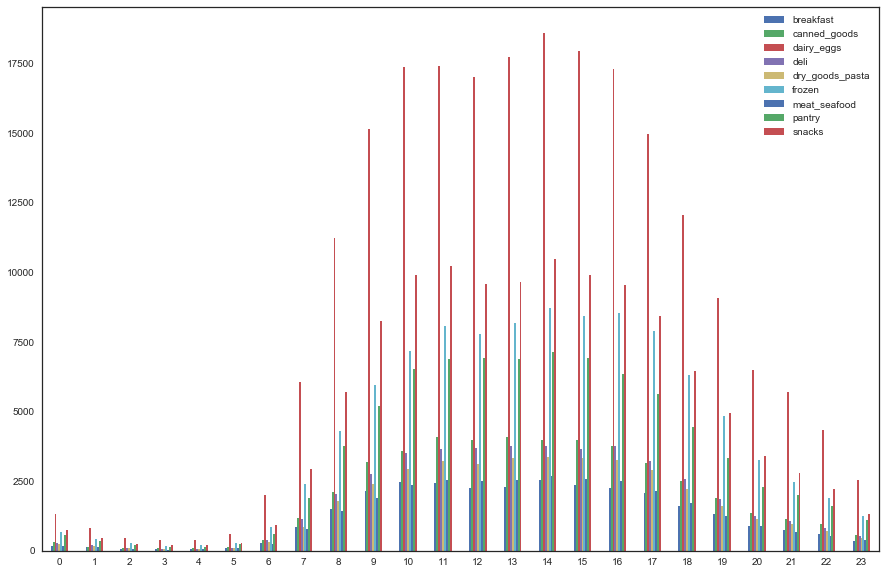

In [138]:

df = pd.DataFrame({'breakfast':breakfast,
                   'canned_goods':canned_goods,
                   'dairy_eggs':dairy_eggs,
                   'deli':deli,
                   'dry_goods_pasta':dry_goods_pasta,
                   'frozen':frozen,
                   'meat_seafood':meat_seafood,
                   'pantry':pantry,
                   'snacks':snacks}, index=labels)

ax = df.plot(kind='bar',rot=0,figsize=(15,10))


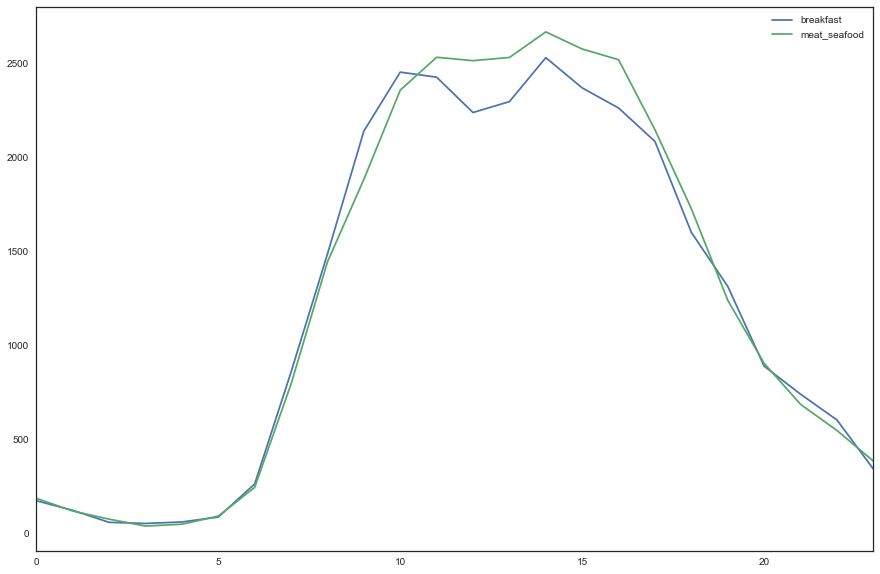

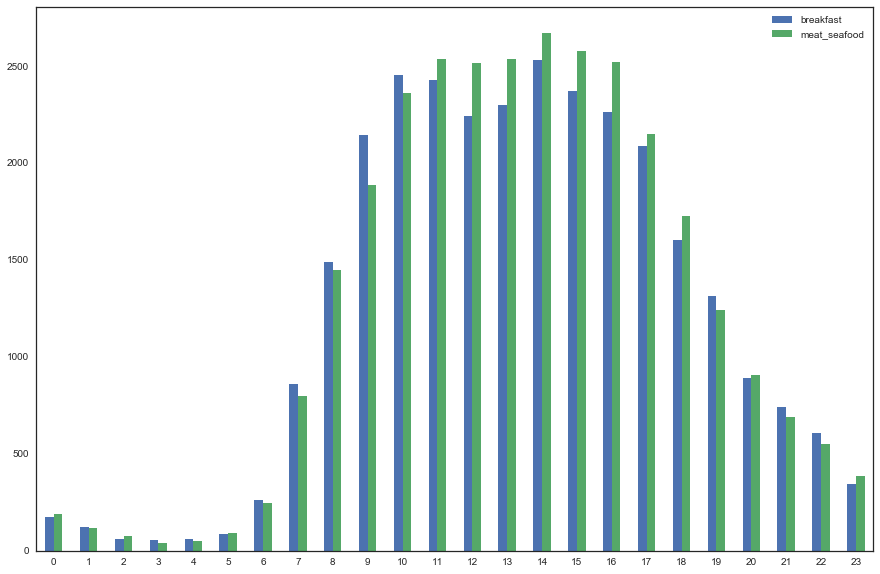

In [155]:

df = pd.DataFrame({
                   'breakfast':breakfast,
                   'meat_seafood':meat_seafood}, index=labels)

ax = df.plot(kind='line',rot=0,figsize=(15,10))
ax = df.plot(kind='bar',rot=0,figsize=(15,10))


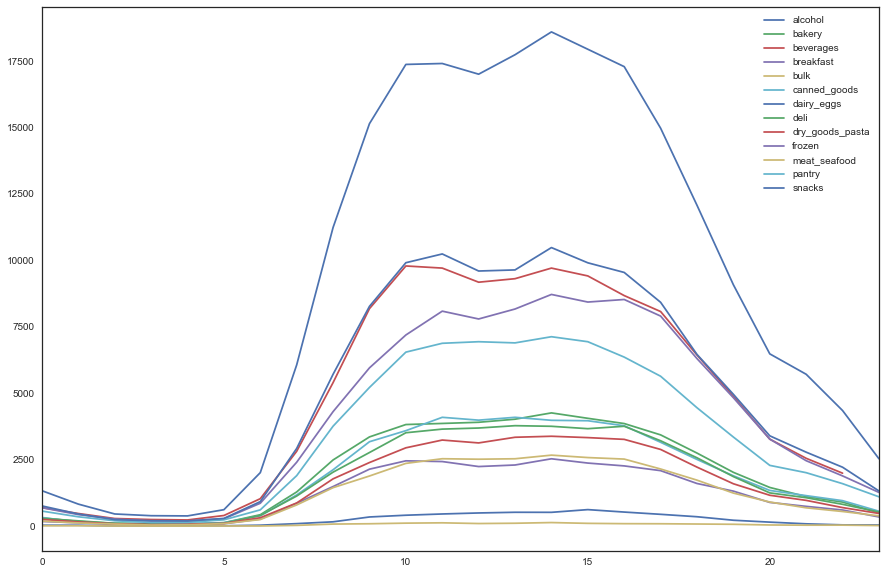

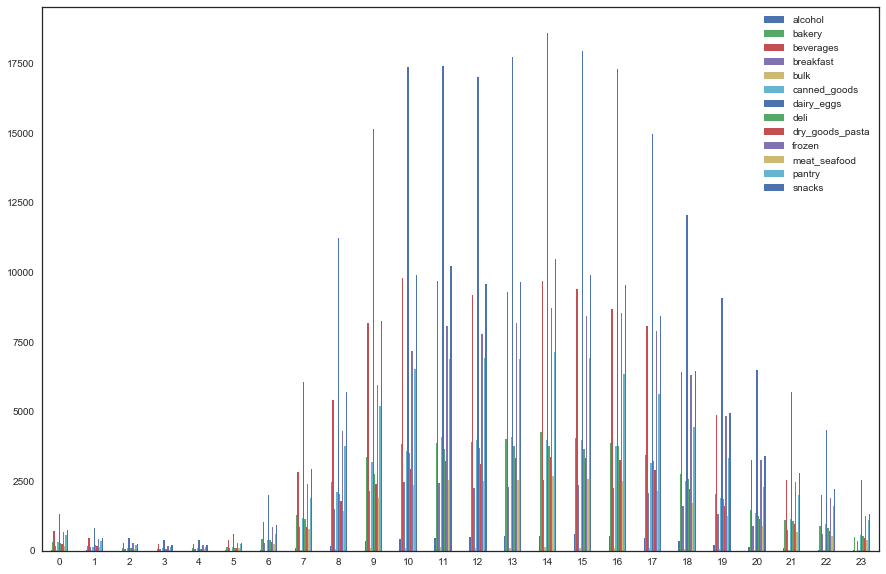

In [157]:

df = pd.DataFrame({'alcohol':alcohol,
                   'bakery':bakery,
                   'beverages':beverages,
                   'breakfast':breakfast,
                   'bulk':bulk,
                   'canned_goods':canned_goods,
                   'dairy_eggs':dairy_eggs,
                   'deli':deli,
                   'dry_goods_pasta':dry_goods_pasta,
                   'frozen':frozen,
                   'meat_seafood':meat_seafood,
                   'pantry':pantry,
                   'snacks':snacks}, index=labels)

ax = df.plot(kind='line',rot=0,figsize=(15,10))
ax = df.plot(kind='bar',rot=0,figsize=(15,10))
